# Chapter 2. End-to-End Machine Learning Project

Here are the steps we will follow:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for ML algorithms.
5. Select a model and train.
6. Present the solution.
7. Launch, monitor, and maintain the system.

## Working with real data

Some popular open data repositories include:

- [UC Irvine ML Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon's AWS datasets](https://registry.opendata.aws)
- [Wikipedias list of machine learning datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
- [this](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public) Quora.com questoins
- the [Datasets subreddit](https://www.reddit.com/r/datasets)

There are a few "meta-portals":

- http://dataportals.org/
- http://opendatamonitor.eu/
- http://quandl.com/

This example analysis will use the California Housing Prices dataset from the StatLib repository based on data from the 1990 CA census.
The goal is the create a model to predict the median housing price in any district.

### Download the data

In [37]:
import os, tarfile
from six.moves import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'assets/homl/housing'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    ''' Download and extract housing data.'''
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    '''Load in housing data as a pandas DataFrame.'''
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

# Download the data.
fetch_housing_data()

# Loading the data as a pandas DataFrame.
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
# Number of missing data points per column.
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [40]:
# The values of 'ocean_proximity' are categorical.
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24779050>,
      dtype=object)

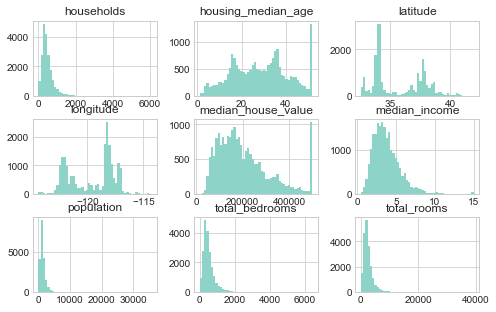

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# Some good default values to use for my Jupyter notebook.
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5), facecolor='white')

housing.hist(bins=50)

A few things to note about the data:

1. The 'median_income' has been scaled and capped to a range of 0.5 and 15.
2. The 'housing_median_age' and 'median_house_value' have been capped, the latter potentially being a problem because that data is the predicted value.
3. The attributes have different scales (discussed later).
4. Many of the histograms have a long tail - a good sign to transform the data, depending on the model.

### Create a test set



In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing data.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)

The author wasnted to ensure that the median income was properly sampled in the training and testing data.
Therefore, he created a categorical variable and used `sklearn.model_selection.StratifiedShuffleSplit()` to split the data into training and testing sets while maintaining equal distributions of this category.

In [44]:
housing['income_cat'] = np.ceil(housing.median_income / 1.5)
housing['income_cat'].where(housing.income_cat < 5.0, 5.0, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [46]:
# Compare splits
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [47]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [48]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [49]:
# Remove unneeded columns.
strat_test_set.drop(['income_cat'], axis=1, inplace=True)
strat_train_set.drop(['income_cat'], axis=1, inplace=True)

## Discover and visualize the data to gain insights